**Exercise: 8.1**

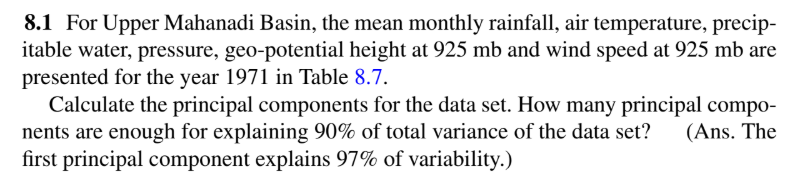

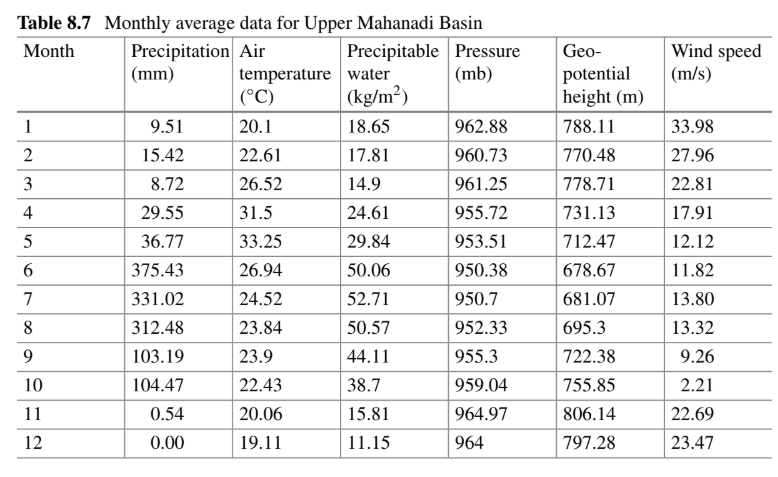

🔹 Step 1: Original Data Frame
 Precipitation  Air_temp  Precipitable_water  Pressure  Geopotential_height  Wind_speed
          9.51     20.10               18.65    962.88               788.11       33.98
         15.42     22.61               17.81    960.73               770.48       27.96
          8.72     26.52               14.90    961.25               778.71       22.81
         29.55     31.50               24.61    955.72               731.13       17.91
         36.77     33.25               29.84    953.51               712.47       12.12
        375.43     26.94               50.06    950.38               678.67       11.82
        331.02     24.52               52.71    950.70               681.07       13.80
        312.48     23.84               50.57    952.33               695.30       13.32
        103.19     23.90               44.11    955.30               722.38        9.26
        104.47     22.43               38.70    959.04               755.85        2.21
  

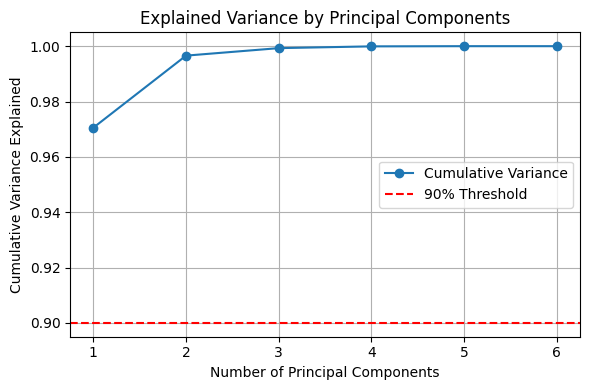

 Number of Principal Components needed to explain ≥90% variance: 1



In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import null_space
import matplotlib.pyplot as plt

# Step 1️⃣: Input Data
data = {
    'Precipitation': [9.51, 15.42, 8.72, 29.55, 36.77, 375.43, 331.02, 312.48, 103.19, 104.47, 0.54, 0.00],
    'Air_temp': [20.1, 22.61, 26.52, 31.5, 33.25, 26.94, 24.52, 23.84, 23.9, 22.43, 20.06, 19.11],
    'Precipitable_water': [18.65, 17.81, 14.9, 24.61, 29.84, 50.06, 52.71, 50.57, 44.11, 38.7, 15.81, 11.15],
    'Pressure': [962.88, 960.73, 961.25, 955.72, 953.51, 950.38, 950.7, 952.33, 955.3, 959.04, 964.97, 964],
    'Geopotential_height': [788.11, 770.48, 778.71, 731.13, 712.47, 678.67, 681.07, 695.3, 722.38, 755.85, 806.14, 797.28],
    'Wind_speed': [33.98, 27.96, 22.81, 17.91, 12.12, 11.82, 13.80, 13.32, 9.26, 2.21, 22.69, 23.47]
}
df = pd.DataFrame(data)
features = df.columns.tolist()


# Adjust pandas display options to show all columns without splitting
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
pd.set_option('display.width', None)  # Ensures wide DataFrames are displayed fully
pd.set_option('display.max_rows', None)  # Ensures all rows are printed, can be adjusted
print("🔹 Step 1: Original Data Frame")
print(df.to_string(index=False))



# Step 2️⃣: Covariance Matrix
print("🔹 Step 2: Compute Covariance Matrix using:")
print("          Sx = (1 / n-1) * Xᵀ · X")
X = df.to_numpy()  # No scaling applied
Sx = np.cov(X.T)
print("✅ Covariance Matrix (Sx):\n", np.round(Sx, 4), "\n")

# Step 3️⃣: Eigenvalue Decomposition
print("🔹 Step 3: Solve Characteristic Equation")
print("          |Sx - λI| = 0  ➡️  Compute eigenvalues")
eigenvalues, _ = np.linalg.eig(Sx)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]

print("✅ Sorted Eigenvalues (λ):")
for i, val in enumerate(eigenvalues, 1):
    print(f"   λ{i} = {val:.4f}")
print()

# Step 4️⃣: Solve (Sx - λI) a = 0 with constraint aᵀa = 1
print("🔹 Step 4: Solve (Sx - λᵢI) aᵢ = 0")
print("          Subject to constraint: aᵢᵀ · aᵢ = 1\n")

pcs = []
for i, λ in enumerate(eigenvalues):
    print(f"🧩 Principal Component {i+1}")
    print(f"   🔸 Equation: (Sx - λ{i+1}·I)·a{i+1} = 0")

    A = Sx - λ * np.eye(Sx.shape[0])
    print(f"   🔸 Matrix (Sx - λ{i+1}·I):")
    print(np.round(A, 4))

    null_vec = null_space(A)
    if null_vec.shape[1] == 0:
        print("   ⚠️ No non-trivial solution found for this eigenvalue.\n")
        continue

    # Normalize the eigenvector
    a_i = null_vec[:, 0]
    a_i /= np.linalg.norm(a_i)
    pcs.append(a_i)

    print(f"   🔸 Normalized eigenvector a{i+1}:")
    for j, coeff in enumerate(a_i):
        print(f"      a{i+1}{j+1} ({features[j]}): {coeff:.4f}")
    print(f"   ✅ Check a{i+1}ᵀ·a{i+1} = {np.dot(a_i, a_i):.4f}\n")

# Step 5️⃣: Construct PCA Matrix
print("🔹 Step 5: Construct PCA Matrix A = [a₁ a₂ ... aₙ]")
pca_matrix = np.column_stack(pcs)
pca_df = pd.DataFrame(pca_matrix, index=features, columns=[f'PC{i+1}' for i in range(pca_matrix.shape[1])])
print("✅ PCA Matrix(Loding matrix U):\n", pca_df.round(4), "\n")

# Step 6️⃣: Explained Variance Ratio
print("🔹 Step 6: Compute Explained Variance Ratio")
print("          EVR = λᵢ / Σλ")
explained_var_ratio = eigenvalues / np.sum(eigenvalues)
cum_var = np.cumsum(explained_var_ratio)

for i, (evr, cv) in enumerate(zip(explained_var_ratio, cum_var), 1):
    print(f"   PC{i}: Explained Variance = {evr:.4f}, Cumulative = {cv:.4f}")

# Step 7️⃣: Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', label='Cumulative Variance')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 7️⃣ (continued): Components needed for ≥90% variance
num_components_90 = np.argmax(cum_var >= 0.90) + 1
print(f" Number of Principal Components needed to explain ≥90% variance: {num_components_90}\n")

**Exercise: 8.8**

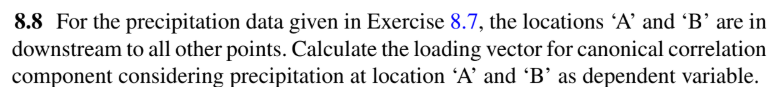

In [ ]:
import numpy as np

# Step 1: Input data
print("Step 1: Input data matrix Z (24 samples × 9 variables)")
Z = np.array([
    [16.06, 17, 27.67, 16.63, 11.07, 19.69, 10.49, 10.62, 11.82],
    [13.52, 15.47, 19.62, 17.15, 8.44, 18.09, 9.86, 10.84, 8.69],
    [10.55, 8.08, 14.91, 17.93, 7.01, 9.66, 5.01, 5.98, 8.23],
    [6.00, 7.26, 15.84, 13.6, 9.68, 8.57, 6.28, 11.55, 10.32],
    [17.73, 12.26, 20.84, 22.98, 9.81, 14.96, 13.45, 10.35, 14.15],
    [166.7, 163.38, 199.45, 214.83, 182.77, 192.6, 221.41, 179.13, 176.47],
    [286.17, 335.33, 331.95, 350.86, 343.31, 336.88, 438.6, 335.86, 312.03],
    [298.75, 287.19, 332.08, 351.87, 309.21, 324.8, 461.72, 351.64, 306.51],
    [156.47, 159.31, 217.76, 171.27, 189.43, 190.72, 178.17, 170.56, 171.18],
    [50.04, 52.69, 54.46, 57.13, 43.08, 49.79, 60.96, 49.19, 46.49],
    [7.13, 7.01, 12.69, 10.34, 5.39, 6.93, 4.73, 9.11, 6.54],
    [10.3, 7.08, 9.82, 8.74, 5.23, 6.65, 2.98, 3.55, 5.49],
    [72.11, 119.22, 26.42, 28.08, 26.42, 0.64, 6.81, 46.87, 29.25],
    [49.10, 76.07, 74.23, 27.95, 34.45, 97.57, 32.46, 33.77, 42.73],
    [0.58, 26.98, 67.47, 50.9, 36.08, 32.61, 11.06, 61.04, 3.85],
    [17.69, 3.86, 14.44, 4.37, 24.96, 16.71, 20.41, 60.04, 2.39],
    [17.52, 5.23, 19.08, 59.96, 20.29, 28.52, 58.06, 63.06, 32.37],
    [209.51, 178.79, 186.59, 224.1, 203.91, 237.33, 285.77, 172.05, 190.35],
    [300.24, 380.61, 320.12, 340.26, 329.33, 356.18, 350.21, 360.4, 312.54],
    [250.33, 282.35, 280.6, 288.46, 363.54, 300.78, 288.54, 322.15, 371.04],
    [198.59, 195.46, 240.21, 201.8, 286.6, 213.29, 178.09, 211.15, 197.2],
    [34.64, 18.37, 80.24, 44.21, 80.05, 80.36, 97.56, 74.69, 43.22],
    [18.91, 17.44, 15.03, 19.3, 9.8, 8.39, 12.53, 53.68, 34.25],
    [31.63, 23.56, 25.63, 34.72, 16.71, 36.64, 4.24, 16.3, 9.53]
])
print(Z)

# Step 2: Split dependent (Y) and independent (X) variables
print("\nStep 2: Split dependent and independent variables")
Y = Z[:, [0, 1]]    # Precipitation at location A and B
X = Z[:, 2:]        # Remaining variables (C to I)
print("\nDependent variable matrix Y (24 samples × 2 variables):")
print(Y)
print("\nIndependent variable matrix X (24 samples × 7 variables):")
print(X)

# Step 3: Covariance matrices
print("\nStep 3: Compute covariance matrices Syy, Sxx, Sxy, and Syx")
cov_Z = np.cov(Z, rowvar=False)
print("\nCovariance matrix of all variables (9×9):")
print(cov_Z)

Syy = cov_Z[0:2, 0:2]
print("\nSyy (covariance among Y variables):")
print(Syy)

Sxx = cov_Z[2:, 2:]
print("\nSxx (covariance among X variables):")
print(Sxx)

Sxy = cov_Z[2:, 0:2]
print("\nSxy (covariance between X and Y):")
print(Sxy)

Syx = Sxy.T
print("\nSyx (covariance between Y and X):")
print(Syx)

# Step 4: Gamma matrix calculation
print("\nStep 4: Calculate Gamma matrix using Syy, Sxx, Syx, Sxy")

# Equation: Gamma = Syy_inv @ Syx @ Sxx_inv @ Sxy
Syy_inv = np.linalg.inv(Syy)
Sxx_inv = np.linalg.inv(Sxx)

Gamma = Syy_inv @ Syx @ Sxx_inv @ Sxy

# Side note for Gamma calculation:
# Gamma matrix is a measure of the relationship between the dependent variables (Y) and independent variables (X).
# It is calculated by combining the covariance matrices and their inverses as follows:
# Gamma = Syy_inv @ Syx @ Sxx_inv @ Sxy

print("\nGamma matrix (2×2):")
print(Gamma)

# Step 5: Eigenvalues and eigenvectors
print("\nStep 5: Compute eigenvalues and eigenvectors of Gamma matrix")

eigvals, eigvecs = np.linalg.eig(Gamma)

# Side note for eigenvalue and eigenvector calculation:
# The eigenvalues (λ²) represent the variance in the directions of the eigenvectors (B matrix).
# Eigenvectors (B matrix) indicate the principal directions of the data variation.

print("\nEigenvalues (λ²):")
print(eigvals)

print("\nEigenvectors (columns correspond to λ²) or B matrix:")
print(eigvecs)

# Step 6: Compute matrix A
print("\nStep 6: Compute A matrix for two components")

A = Sxx_inv @ Sxy @ eigvecs

# Side note for A matrix calculation:
# Matrix A represents the transformation from the independent variable space (X) to the dependent variable space (Y).
# It is calculated by multiplying the inverse of the covariance of X (Sxx_inv), the covariance between X and Y (Sxy),
# and the eigenvectors (B matrix) that define the principal components.

print("\nMatrix A (7×2):")
print(A)


Step 1: Input data matrix Z (24 samples × 9 variables)
[[ 16.06  17.    27.67  16.63  11.07  19.69  10.49  10.62  11.82]
 [ 13.52  15.47  19.62  17.15   8.44  18.09   9.86  10.84   8.69]
 [ 10.55   8.08  14.91  17.93   7.01   9.66   5.01   5.98   8.23]
 [  6.     7.26  15.84  13.6    9.68   8.57   6.28  11.55  10.32]
 [ 17.73  12.26  20.84  22.98   9.81  14.96  13.45  10.35  14.15]
 [166.7  163.38 199.45 214.83 182.77 192.6  221.41 179.13 176.47]
 [286.17 335.33 331.95 350.86 343.31 336.88 438.6  335.86 312.03]
 [298.75 287.19 332.08 351.87 309.21 324.8  461.72 351.64 306.51]
 [156.47 159.31 217.76 171.27 189.43 190.72 178.17 170.56 171.18]
 [ 50.04  52.69  54.46  57.13  43.08  49.79  60.96  49.19  46.49]
 [  7.13   7.01  12.69  10.34   5.39   6.93   4.73   9.11   6.54]
 [ 10.3    7.08   9.82   8.74   5.23   6.65   2.98   3.55   5.49]
 [ 72.11 119.22  26.42  28.08  26.42   0.64   6.81  46.87  29.25]
 [ 49.1   76.07  74.23  27.95  34.45  97.57  32.46  33.77  42.73]
 [  0.58  26.98  67.4

**Exercise: 8.11**

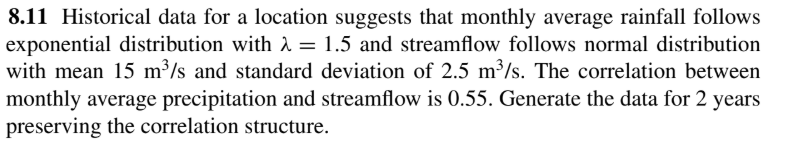

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# Step 1: Generate uncorrelated random variables using Excel's RAND() behavior
n = 24  # Number of samples (2 years of monthly data)

# Generate uncorrelated uniform random variables U1 and U2 between 0 and 1 (Excel RAND-like behavior)
u1 = np.random.rand(n)  # Random values for Rainfall (Uniform [0, 1])
u2 = np.random.rand(n)  # Random values for Streamflow (Uniform [0, 1])

# Stack them into a 2D array (n samples, 2 variables)
u = np.column_stack((u1, u2))

# 💡 Explanation:
# We generate n random samples for two independent variables (uniform [0, 1]) using Excel-like behavior.

print("\n--- Step 1: Generated Uncorrelated Random Data (Excel-like RAND()) ---")
print("Equations used:")
print("1. U1 ~ Uniform(0, 1)")
print("2. U2 ~ Uniform(0, 1)")
print(u)

# Step 2: Define the correlation matrix for rainfall and streamflow
rho = 0.55  # Given correlation between rainfall and streamflow
cov_matrix = np.array([[1, rho], [rho, 1]])

# 💡 Explanation:
# This covariance matrix defines the correlation structure between rainfall and streamflow.

print("\n--- Step 2: Correlation Matrix ---")
print("Equation used:")
print("Covariance Matrix = [[1, rho], [rho, 1]] where rho = 0.55")
print(cov_matrix)

# Step 3: Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 💡 Explanation:
# Eigenvalues and eigenvectors help us perform a principal component transformation to introduce correlation
# between the two variables based on the covariance matrix.

print("\n--- Step 3: Eigenvalues and Eigenvectors ---")
print("Equations used:")
print("Eigenvalue decomposition: Cov_matrix = V * D * V^-1")
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

# Step 4: Apply PCA to transform the uncorrelated uniform data to correlated data
correlated_data = np.dot(u - np.mean(u, axis=0), eigenvectors)

# 💡 Explanation:
# We multiply the uncorrelated uniform data by the eigenvectors to obtain correlated data.
# This transformation ensures that the data will have the desired correlation structure.

print("\n--- Step 4: Transformed Correlated Data (Z Values) ---")
print("Equation used:")
print("Z = (U - mean(U)) * eigenvectors")
print(correlated_data)

# Step 5: Convert correlated data (Z1, Z2) to uniform [0, 1] using the CDF of standard normal distribution
u_transformed = stats.norm.cdf(correlated_data)

# 💡 Explanation:
# We convert the correlated data to uniform [0,1] by applying the standard normal CDF.
# This will allow us to map the uniform values to the respective target distributions.

print("\n--- Step 5: Convert Correlated Data to Uniform [0, 1] ---")
print("Equation used:")
print("U_transformed = Phi(Z), where Phi is the standard normal CDF")
print(u_transformed)

# Step 6: Convert uniform variables to target distributions

# 6a: Rainfall ~ Exponential(λ = 1.5), scale = 1/λ = 0.6667
# Equation: Rainfall = F⁻¹_Exp(U1) = -ln(1 - U1)/λ
rainfall = stats.expon.ppf(u_transformed[:, 0], scale=1/1.5)

# 💡 Explanation:
# We are transforming U1 (uniform values) into exponential values using the inverse CDF
# of the exponential distribution with λ = 1.5. This gives realistic rainfall values
# that are positively skewed, which matches natural rainfall patterns.

print("\n--- Step 6a: Converted Rainfall Values ---")
print("Equation used:")
print("Rainfall = -ln(1 - U1) / λ where λ = 1.5")
print(rainfall)

# 6b: Streamflow ~ Normal(μ = 15, σ = 2.5)
# Equation: Streamflow = μ + σ * Φ⁻¹(U2)
streamflow = stats.norm.ppf(u_transformed[:, 1], loc=15, scale=2.5)

# 💡 Explanation:
# We are transforming U2 into normally distributed streamflow values using the inverse CDF
# of the normal distribution. These values are centered around 15 m³/s and represent
# typical monthly average streamflows.

print("\n--- Step 6b: Converted Streamflow Values ---")
print("Equation used:")
print("Streamflow = μ + σ * Φ⁻¹(U2) where μ = 15, σ = 2.5")
print(streamflow)

# Combine results into a dataframe
data = pd.DataFrame({
    'Month': np.arange(1, n+1),
    'Rainfall (mm)': np.round(rainfall, 2),
    'Streamflow (m³/s)': np.round(streamflow, 2)
})

# Print results
print("\n--- Generated Data (24 months) ---")
print(data)




--- Step 1: Generated Uncorrelated Random Data (Excel-like RAND()) ---
Equations used:
1. U1 ~ Uniform(0, 1)
2. U2 ~ Uniform(0, 1)
[[0.37454012 0.45606998]
 [0.95071431 0.78517596]
 [0.73199394 0.19967378]
 [0.59865848 0.51423444]
 [0.15601864 0.59241457]
 [0.15599452 0.04645041]
 [0.05808361 0.60754485]
 [0.86617615 0.17052412]
 [0.60111501 0.06505159]
 [0.70807258 0.94888554]
 [0.02058449 0.96563203]
 [0.96990985 0.80839735]
 [0.83244264 0.30461377]
 [0.21233911 0.09767211]
 [0.18182497 0.68423303]
 [0.18340451 0.44015249]
 [0.30424224 0.12203823]
 [0.52475643 0.49517691]
 [0.43194502 0.03438852]
 [0.29122914 0.9093204 ]
 [0.61185289 0.25877998]
 [0.13949386 0.66252228]
 [0.29214465 0.31171108]
 [0.36636184 0.52006802]]

--- Step 2: Correlation Matrix ---
Equation used:
Covariance Matrix = [[1, rho], [rho, 1]] where rho = 0.55
[[1.   0.55]
 [0.55 1.  ]]

--- Step 3: Eigenvalues and Eigenvectors ---
Equations used:
Eigenvalue decomposition: Cov_matrix = V * D * V^-1
Eigenvalues: [1.5

**Exercise:9.1**


=== TREND ANALYSIS USING MANN-KENDALL AND KENDALL'S TAU TESTS ===

Data (Evapotranspiration in cm/year over 20 years):
[61.04, 58.71, 60.02, 60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45, 65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04, 66.53, 68.02]

--- (A) Mann-Kendall Test ---
H0 (Null Hypothesis): No trend in the time series.
H1 (Alternative Hypothesis): A trend exists in the time series.
Significance Level (α) = 0.1 (two-tailed test)

Step 1: Mann-Kendall Statistic (S)
Equation: S = Σ(i=1 to N-1) Σ(j=i+1 to N) sign(xj - xi)
Calculated S = 146

Step 2: Variance of S
Equation: Var(S) = [N(N−1)(2N+5)] / 18
Calculated Var(S) = 950.00

Step 3: Z-test Statistic
Equation: Z = (S - 1)/√Var(S)  [if S > 0]
Calculated Z = 4.704

Step 4: Critical Z value for α = 0.1 (two-tailed)
Z_critical = Z_(α/2) = Z_(0.05) = 1.645

Step 5: Hypothesis Decision
Since |Z| = 4.704 > 1.645, Reject H0 ⇒ Significant trend exists.

--- (B) Kendall’s Tau Test ---
H0 (Null Hypothesis): No trend in the tim

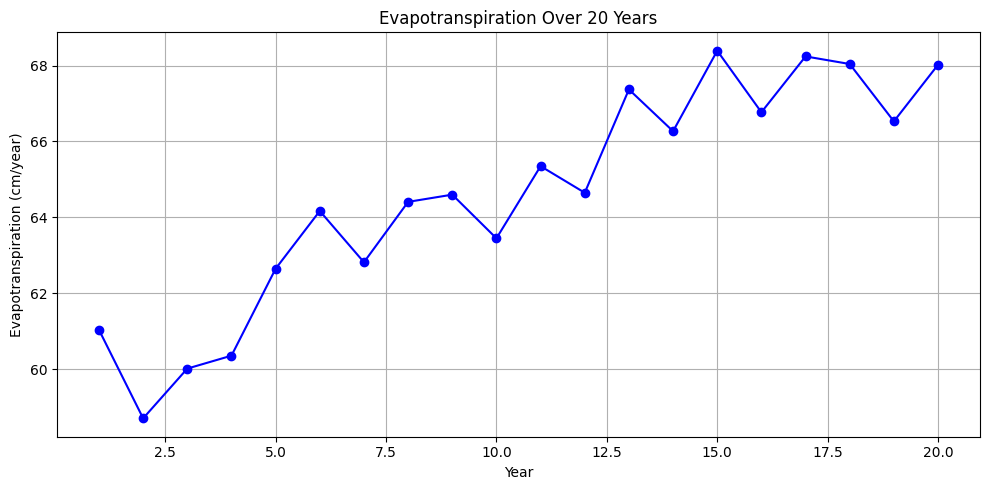

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Evapotranspiration data (20 years)
evapo_data = [61.04, 58.71, 60.02, 60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45,
              65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04, 66.53, 68.02]

N = len(evapo_data)
alpha = 0.10  # Significance level

print("\n=== TREND ANALYSIS USING MANN-KENDALL AND KENDALL'S TAU TESTS ===")
print(f"\nData (Evapotranspiration in cm/year over {N} years):")
print(evapo_data)

# -------------------------
# Mann-Kendall Test
# -------------------------
print("\n--- (A) Mann-Kendall Test ---")
print("H0 (Null Hypothesis): No trend in the time series.")
print("H1 (Alternative Hypothesis): A trend exists in the time series.")
print(f"Significance Level (α) = {alpha} (two-tailed test)")

# Equation for Mann-Kendall S:
# S = Σ(i=1 to N-1) Σ(j=i+1 to N) sign(xj - xi)
S = 0
for i in range(N-1):
    for j in range(i+1, N):
        if evapo_data[j] > evapo_data[i]:
            S += 1
        elif evapo_data[j] < evapo_data[i]:
            S -= 1

print(f"\nStep 1: Mann-Kendall Statistic (S)")
print("Equation: S = Σ(i=1 to N-1) Σ(j=i+1 to N) sign(xj - xi)")
print(f"Calculated S = {S}")

# Equation for variance:
# Var(S) = [N(N−1)(2N+5)] / 18
Var_S = N * (N - 1) * (2 * N + 5) / 18
print(f"\nStep 2: Variance of S")
print("Equation: Var(S) = [N(N−1)(2N+5)] / 18")
print(f"Calculated Var(S) = {Var_S:.2f}")

# Equation for test statistic Z:
# If S > 0: Z = (S − 1)/√Var(S)
# If S < 0: Z = (S + 1)/√Var(S)
# If S = 0: Z = 0
if S > 0:
    Z = (S - 1) / np.sqrt(Var_S)
elif S < 0:
    Z = (S + 1) / np.sqrt(Var_S)
else:
    Z = 0

print(f"\nStep 3: Z-test Statistic")
print("Equation: Z = (S - 1)/√Var(S)  [if S > 0]")
print(f"Calculated Z = {Z:.3f}")

Z_crit = stats.norm.ppf(1 - alpha/2)
print(f"\nStep 4: Critical Z value for α = {alpha} (two-tailed)")
print("Z_critical = Z_(α/2) = Z_(0.05) = {:.3f}".format(Z_crit))

# Decision
print("\nStep 5: Hypothesis Decision")
if abs(Z) > Z_crit:
    print(f"Since |Z| = {abs(Z):.3f} > {Z_crit:.3f}, Reject H0 ⇒ Significant trend exists.")
else:
    print(f"Since |Z| = {abs(Z):.3f} ≤ {Z_crit:.3f}, Fail to Reject H0 ⇒ No significant trend.")

# -------------------------
# Kendall’s Tau Test
# -------------------------
print("\n--- (B) Kendall’s Tau Test ---")
print("H0 (Null Hypothesis): No trend in the time series.")
print("H1 (Alternative Hypothesis): A trend exists in the time series.")

# Equation for concordant (p) and discordant (q) pairs
concordant = 0
discordant = 0
for i in range(N-1):
    for j in range(i+1, N):
        if evapo_data[j] > evapo_data[i]:
            concordant += 1
        elif evapo_data[j] < evapo_data[i]:
            discordant += 1

p = concordant
q = discordant

print(f"\nStep 1: Concordant and Discordant Pairs")
print("Concordant (p): Count of xj > xi")
print("Discordant (q): Count of xj < xi")
print(f"p = {p}, q = {q}")

# Equation for Kendall's Tau:
# τ = (p - q) / [0.5 * N * (N - 1)]
tau = (p - q) / (0.5 * N * (N - 1))
print(f"\nStep 2: Kendall’s Tau Coefficient (τ)")
print("Equation: τ = (p - q) / [0.5 * N * (N - 1)]")
print(f"Calculated τ = {tau:.3f}")

# Equation for Variance of τ:
# Var(τ) = [2(2N+5)] / [9N(N-1)]
Var_tau = (2 * (2 * N + 5)) / (9 * N * (N - 1))
print(f"\nStep 3: Variance of τ")
print("Equation: Var(τ) = [2(2N+5)] / [9N(N-1)]")
print(f"Calculated Var(τ) = {Var_tau:.4f}")

# Equation for z-test statistic for tau:
# z = τ / sqrt(Var(τ))
z_tau = tau / np.sqrt(Var_tau)
print(f"\nStep 4: Z-test Statistic for τ")
print("Equation: z = τ / √Var(τ)")
print(f"Calculated z = {z_tau:.3f}")

# Decision
print("\nStep 5: Hypothesis Decision for τ")
if abs(z_tau) > Z_crit:
    print(f"Since |z| = {abs(z_tau):.3f} > {Z_crit:.3f}, Reject H0 ⇒ Significant trend exists.")
else:
    print(f"Since |z| = {abs(z_tau):.3f} ≤ {Z_crit:.3f}, Fail to Reject H0 ⇒ No significant trend.")

# Optional: Visual inspection
plt.figure(figsize=(10, 5))
plt.plot(range(1, N+1), evapo_data, marker='o', linestyle='-', color='blue')
plt.title("Evapotranspiration Over 20 Years")
plt.xlabel("Year")
plt.ylabel("Evapotranspiration (cm/year)")
plt.grid(True)
plt.tight_layout()
plt.show()



=== TREND ANALYSIS USING MANN-KENDALL AND KENDALL'S TAU TESTS ===

Data (Evapotranspiration in cm/year over 20 years):
[61.04, 58.71, 60.02, 60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45, 65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04, 66.53, 68.02]

--- (A) Mann-Kendall Test ---
H0 (Null Hypothesis): No trend in the time series.
H1 (Alternative Hypothesis): A trend exists in the time series.
Significance Level (α) = 0.05 (two-tailed test)

Step 1: Mann-Kendall Statistic (S)
Equation: S = Σ(i=1 to N-1) Σ(j=i+1 to N) sign(xj - xi)
Calculated S = 146

Step 2: Variance of S
Equation: Var(S) = [N(N−1)(2N+5)] / 18
Calculated Var(S) = 950.00

Step 3: Z-test Statistic
Equation: Z = (S - 1)/√Var(S)  [if S > 0]
Calculated Z = 4.704

Step 4: Critical Z value for α = 0.05 (two-tailed)
Z_critical = Z_(α/2) = Z_(0.025) = 1.960

Step 5: Hypothesis Decision
Since |Z| = 4.704 > 1.960, Reject H0 ⇒ Significant trend exists.

--- (B) Kendall’s Tau Test ---
H0 (Null Hypothesis): No trend in the 

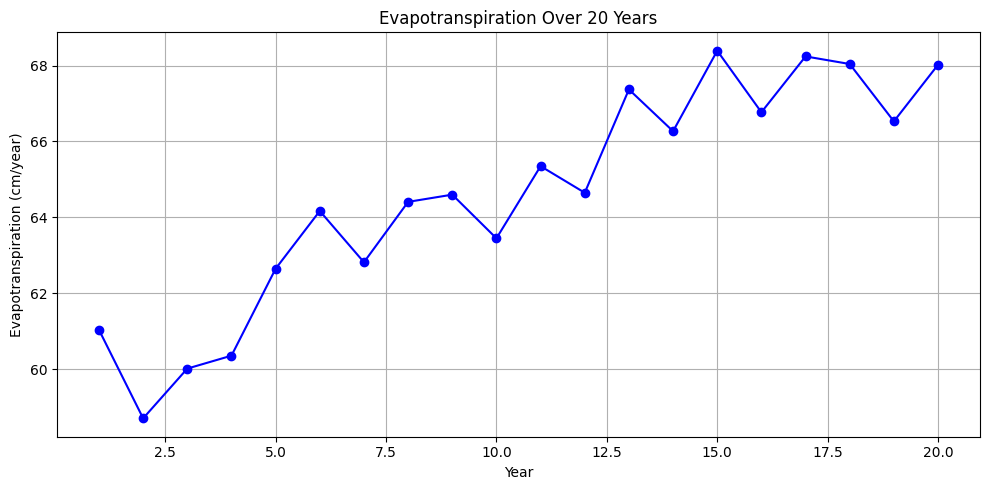

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Evapotranspiration data (20 years)
evapo_data = [61.04, 58.71, 60.02, 60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45,
              65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04, 66.53, 68.02]

N = len(evapo_data)
alpha = 0.05  # Significance level

print("\n=== TREND ANALYSIS USING MANN-KENDALL AND KENDALL'S TAU TESTS ===")
print(f"\nData (Evapotranspiration in cm/year over {N} years):")
print(evapo_data)

# -------------------------
# Mann-Kendall Test
# -------------------------
print("\n--- (A) Mann-Kendall Test ---")
print("H0 (Null Hypothesis): No trend in the time series.")
print("H1 (Alternative Hypothesis): A trend exists in the time series.")
print(f"Significance Level (α) = {alpha} (two-tailed test)")

# Equation for Mann-Kendall S:
# S = Σ(i=1 to N-1) Σ(j=i+1 to N) sign(xj - xi)
S = 0
for i in range(N-1):
    for j in range(i+1, N):
        if evapo_data[j] > evapo_data[i]:
            S += 1
        elif evapo_data[j] < evapo_data[i]:
            S -= 1

print(f"\nStep 1: Mann-Kendall Statistic (S)")
print("Equation: S = Σ(i=1 to N-1) Σ(j=i+1 to N) sign(xj - xi)")
print(f"Calculated S = {S}")

# Equation for variance:
# Var(S) = [N(N−1)(2N+5)] / 18
Var_S = N * (N - 1) * (2 * N + 5) / 18
print(f"\nStep 2: Variance of S")
print("Equation: Var(S) = [N(N−1)(2N+5)] / 18")
print(f"Calculated Var(S) = {Var_S:.2f}")

# Equation for test statistic Z:
# If S > 0: Z = (S − 1)/√Var(S)
# If S < 0: Z = (S + 1)/√Var(S)
# If S = 0: Z = 0
if S > 0:
    Z = (S - 1) / np.sqrt(Var_S)
elif S < 0:
    Z = (S + 1) / np.sqrt(Var_S)
else:
    Z = 0

print(f"\nStep 3: Z-test Statistic")
print("Equation: Z = (S - 1)/√Var(S)  [if S > 0]")
print(f"Calculated Z = {Z:.3f}")

Z_crit = stats.norm.ppf(1 - alpha/2)
print(f"\nStep 4: Critical Z value for α = {alpha} (two-tailed)")
print("Z_critical = Z_(α/2) = Z_(0.025) = {:.3f}".format(Z_crit))

# Decision
print("\nStep 5: Hypothesis Decision")
if abs(Z) > Z_crit:
    print(f"Since |Z| = {abs(Z):.3f} > {Z_crit:.3f}, Reject H0 ⇒ Significant trend exists.")
else:
    print(f"Since |Z| = {abs(Z):.3f} ≤ {Z_crit:.3f}, Fail to Reject H0 ⇒ No significant trend.")

# -------------------------
# Kendall’s Tau Test
# -------------------------
print("\n--- (B) Kendall’s Tau Test ---")
print("H0 (Null Hypothesis): No trend in the time series.")
print("H1 (Alternative Hypothesis): A trend exists in the time series.")

# Equation for concordant (p) and discordant (q) pairs
concordant = 0
discordant = 0
for i in range(N-1):
    for j in range(i+1, N):
        if evapo_data[j] > evapo_data[i]:
            concordant += 1
        elif evapo_data[j] < evapo_data[i]:
            discordant += 1

p = concordant
q = discordant

print(f"\nStep 1: Concordant and Discordant Pairs")
print("Concordant (p): Count of xj > xi")
print("Discordant (q): Count of xj < xi")
print(f"p = {p}, q = {q}")

# Equation for Kendall's Tau:
# τ = (p - q) / [0.5 * N * (N - 1)]
tau = (p - q) / (0.5 * N * (N - 1))
print(f"\nStep 2: Kendall’s Tau Coefficient (τ)")
print("Equation: τ = (p - q) / [0.5 * N * (N - 1)]")
print(f"Calculated τ = {tau:.3f}")

# Equation for Variance of τ:
# Var(τ) = [2(2N+5)] / [9N(N-1)]
Var_tau = (2 * (2 * N + 5)) / (9 * N * (N - 1))
print(f"\nStep 3: Variance of τ")
print("Equation: Var(τ) = [2(2N+5)] / [9N(N-1)]")
print(f"Calculated Var(τ) = {Var_tau:.4f}")

# Equation for z-test statistic for tau:
# z = τ / sqrt(Var(τ))
z_tau = tau / np.sqrt(Var_tau)
print(f"\nStep 4: Z-test Statistic for τ")
print("Equation: z = τ / √Var(τ)")
print(f"Calculated z = {z_tau:.3f}")

# Decision
print("\nStep 5: Hypothesis Decision for τ")
if abs(z_tau) > Z_crit:
    print(f"Since |z| = {abs(z_tau):.3f} > {Z_crit:.3f}, Reject H0 ⇒ Significant trend exists.")
else:
    print(f"Since |z| = {abs(z_tau):.3f} ≤ {Z_crit:.3f}, Fail to Reject H0 ⇒ No significant trend.")

# Optional: Visual inspection
plt.figure(figsize=(10, 5))
plt.plot(range(1, N+1), evapo_data, marker='o', linestyle='-', color='blue')
plt.title("Evapotranspiration Over 20 Years")
plt.xlabel("Year")
plt.ylabel("Evapotranspiration (cm/year)")
plt.grid(True)
plt.tight_layout()
plt.show()
